In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata, kruskal
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

In [2]:
df = pd.read_csv(
    "../../../Documents/Data science/Machine Learning/NEW EDA TRIAL 1/Breathonix All data.csv"
)
df

Samples  Pos_Neg           m015  Unnamed: 3       m015.870  Unnamed: 5  \
0        NaN      NaN  Concentration  Background  Concentration  Background   
1      BB100  Healthy       9.964196    7.431413     0.17588459  0.26441872   
2      BB104  Healthy      10.567477   5.6089854     0.26634547  0.19099146   
3      BB105  Healthy       8.333734   6.1969657     0.32461444  0.21553819   
4      BB106  Healthy      14.523387    7.892899      0.3011829   0.3985153   
..       ...      ...            ...         ...            ...         ...   
266  Covid47    Covid      15.590312   23.545021       4.333447    4.816081   
267  Covid48    Covid      19.808813    24.00982      4.7370014   4.8646855   
268  Covid49    Covid      16.509943   25.669067      4.1187377    4.350658   
269  Covid50    Covid      15.103385   24.918398       3.694349    4.707345   
270     COV6    Covid       8.497505   15.590983     0.16975154  0.13037892   

          m015.280  Unnamed: 7       m015.580  Unnamed: 9  ...           m496  \
0    Concentration  Background  Concentration  Background  ...  Concentration   
1       0.24309719  0.39712238     0.40226057  0.34483337  ...     0.01950684   
2       0.29153645   0.2741557      0.5886143  0.28422907  ...    0.016137505   
3       0.31774506  0.28721002      0.5618801  0.17273556  ...     0.02157031   
4       0.45967412    0.445012     0.41941085  0.60949326  ...     0.03508032   
..             ...         ...            ...         ...  ...            ...   
266       4.320039   4.7977085       3.967096   4.6469364  ...    0.009456055   
267      4.2339063   5.1657386        4.23167    4.575914  ...    0.007505368   
268      4.6884007    4.815689       3.872783   4.1278462  ...    0.009596125   
269      4.3390603   4.4041133      3.6355598    4.269871  ...    0.002381151   
270      0.3496271  0.23319335     0.31518337   0.3311466  ...    0.045680355   

    Unnamed: 1113           m497 Unnamed: 1115           m498 Unnamed: 1117  \
0      Background  Concentration    Background  Concentration    Background   
1      0.01517255    0.032202322   0.028167652    0.008733475   0.023819476   
2      0.03242302     0.02529122   0.025935814    0.032247577    0.02594901   
3     0.022640578    0.023862606   0.022686109    0.028596148    0.02720005   
4     0.058627635    0.025771832   0.051942497    0.016417352   0.056415424   
..            ...            ...           ...            ...           ...   
266             0    0.009528225   0.009848927    0.007138019   0.002468122   
267   0.009894182    0.012413208   0.012423673    0.012497033   0.024884135   
268   0.002385086     0.00470921   0.017051125    0.004745882    0.01699314   
269   0.014554788    0.014201437   0.009795767    0.007114889   0.004772044   
270   0.028688231    0.024999706   0.023654113    0.016534282   0.018731026   

              m499 Unnamed: 1119           m500 Unnamed: 1121  
0    Concentration    Background  Concentration    Background  
1      0.023681238    0.03678195     0.02808933    0.02594042  
2       0.04141325   0.025965095    0.027640784    0.03243285  
3      0.038008466   0.036156427    0.023812218   0.018104864  
4      0.032684248   0.047254354     0.04195628   0.049625367  
..             ...           ...            ...           ...  
266    0.004744435   0.002471498     0.00478706   0.002452976  
267    0.014966383   0.009948695    0.007450788   0.005022738  
268    0.004742662   0.004773435    0.004742662   0.004815893  
269    0.007149967   0.009639498     0.00469893   0.004934369  
270    0.037292253   0.029113986     0.03709014    0.02365434  

[271 rows x 1122 columns]

In [3]:
df.columns[3:]

Index(['Unnamed: 3', 'm015.870', 'Unnamed: 5', 'm015.280', 'Unnamed: 7',
       'm015.580', 'Unnamed: 9', 'r_O', 'r', 'm016.150',
       ...
       'm496', 'Unnamed: 1113', 'm497', 'Unnamed: 1115', 'm498',
       'Unnamed: 1117', 'm499', 'Unnamed: 1119', 'm500', 'Unnamed: 1121'],
      dtype='object', length=1119)

In [4]:
# Remove every other column from column 4 to 1122
cols_to_remove = [col for i, col in enumerate(df.columns[3:], start=2) if i % 2 == 0]
df.drop(columns=cols_to_remove, inplace=True)

In [5]:
df

Samples  Pos_Neg           m015       m015.870       m015.280  \
0        NaN      NaN  Concentration  Concentration  Concentration   
1      BB100  Healthy       9.964196     0.17588459     0.24309719   
2      BB104  Healthy      10.567477     0.26634547     0.29153645   
3      BB105  Healthy       8.333734     0.32461444     0.31774506   
4      BB106  Healthy      14.523387      0.3011829     0.45967412   
..       ...      ...            ...            ...            ...   
266  Covid47    Covid      15.590312       4.333447       4.320039   
267  Covid48    Covid      19.808813      4.7370014      4.2339063   
268  Covid49    Covid      16.509943      4.1187377      4.6884007   
269  Covid50    Covid      15.103385       3.694349      4.3390603   
270     COV6    Covid       8.497505     0.16975154      0.3496271   

          m015.580            r_O       m016.150       m016.450  \
0    Concentration  Concentration  Concentration  Concentration   
1       0.40226057      7.3340816     0.23056428     0.22569472   
2        0.5886143      7.3466353      0.3236811     0.31766307   
3        0.5618801      7.8557725     0.26945373     0.25309956   
4       0.41941085       8.323005      0.3292765     0.35532996   
..             ...            ...            ...            ...   
266       3.967096     0.96094626      3.4779046      3.9246957   
267        4.23167      1.0867163      4.3457174      3.5483882   
268       3.872783      0.9037358      3.8877335       3.699686   
269      3.6355598      1.0909165      3.6552818       3.127682   
270     0.31518337      3.0360394     0.13911428     0.21599524   

          m016.750  ...           m491           m492           m493  \
0    Concentration  ...  Concentration  Concentration  Concentration   
1       0.35022447  ...    0.025886754    0.028101534    0.028032867   
2       0.37221286  ...    0.011531963    0.027613064    0.027608385   
3       0.35708943  ...    0.024008356    0.026152685    0.019177228   
4        0.3172712  ...    0.027758995    0.016346091    0.039579343   
..             ...  ...            ...            ...            ...   
266      3.2859542  ...     0.01183683              0    0.007131479   
267      3.9160032  ...    0.017404875     0.00496005    0.009999479   
268       3.359644  ...    0.002402153    0.016603114    0.009586896   
269      2.8216934  ...    0.016625382     0.01420144     0.00946917   
270       0.428254  ...    0.012448418     0.04569448    0.016559755   

              m494           m495           m496           m497  \
0    Concentration  Concentration  Concentration  Concentration   
1       0.01289999    0.017242817     0.01950684    0.032202322   
2      0.032267205    0.020734241    0.016137505     0.02529122   
3      0.024055481     0.03372614     0.02157031    0.023862606   
4       0.03749853    0.030480003     0.03508032    0.025771832   
..             ...            ...            ...            ...   
266    0.009548054    0.019011088    0.009456055    0.009528225   
267    0.012438077    0.010003892    0.007505368    0.012413208   
268    0.004782602    0.009546955    0.009596125     0.00470921   
269     0.00472901    0.014271007    0.002381151    0.014201437   
270    0.016392672    0.029095046    0.045680355    0.024999706   

              m498           m499           m500  
0    Concentration  Concentration  Concentration  
1      0.008733475    0.023681238     0.02808933  
2      0.032247577     0.04141325    0.027640784  
3      0.028596148    0.038008466    0.023812218  
4      0.016417352    0.032684248     0.04195628  
..             ...            ...            ...  
266    0.007138019    0.004744435     0.00478706  
267    0.012497033    0.014966383    0.007450788  
268    0.004745882    0.004742662    0.004742662  
269    0.007114889    0.007149967     0.00469893  
270    0.016534282    0.037292253     0.03709014  

[271 rows x 562 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 562 entries, Samples to m500
dtypes: object(562)
memory usage: 1.2+ MB


In [7]:
df = df.iloc[1:, :].reset_index(drop=True)
df = df.dropna()
df = df.reset_index(drop=True)
df

Samples  Pos_Neg       m015    m015.870    m015.280    m015.580  \
0      BB100  Healthy   9.964196  0.17588459  0.24309719  0.40226057   
1      BB104  Healthy  10.567477  0.26634547  0.29153645   0.5886143   
2      BB105  Healthy   8.333734  0.32461444  0.31774506   0.5618801   
3      BB106  Healthy  14.523387   0.3011829  0.45967412  0.41941085   
4      BB107  Healthy   8.993905  0.33732152   0.2971777   0.4720364   
..       ...      ...        ...         ...         ...         ...   
265  Covid47    Covid  15.590312    4.333447    4.320039    3.967096   
266  Covid48    Covid  19.808813   4.7370014   4.2339063     4.23167   
267  Covid49    Covid  16.509943   4.1187377   4.6884007    3.872783   
268  Covid50    Covid  15.103385    3.694349   4.3390603   3.6355598   
269     COV6    Covid   8.497505  0.16975154   0.3496271  0.31518337   

            r_O    m016.150    m016.450    m016.750  ...         m491  \
0     7.3340816  0.23056428  0.22569472  0.35022447  ...  0.025886754   
1     7.3466353   0.3236811  0.31766307  0.37221286  ...  0.011531963   
2     7.8557725  0.26945373  0.25309956  0.35708943  ...  0.024008356   
3      8.323005   0.3292765  0.35532996   0.3172712  ...  0.027758995   
4      7.144835  0.36034217  0.32494903  0.44146624  ...   0.03309416   
..          ...         ...         ...         ...  ...          ...   
265  0.96094626   3.4779046   3.9246957   3.2859542  ...   0.01183683   
266   1.0867163   4.3457174   3.5483882   3.9160032  ...  0.017404875   
267   0.9037358   3.8877335    3.699686    3.359644  ...  0.002402153   
268   1.0909165   3.6552818    3.127682   2.8216934  ...  0.016625382   
269   3.0360394  0.13911428  0.21599524    0.428254  ...  0.012448418   

            m492         m493         m494         m495         m496  \
0    0.028101534  0.028032867   0.01289999  0.017242817   0.01950684   
1    0.027613064  0.027608385  0.032267205  0.020734241  0.016137505   
2    0.026152685  0.019177228  0.024055481   0.03372614   0.02157031   
3    0.016346091  0.039579343   0.03749853  0.030480003   0.03508032   
4    0.028180256  0.039785925  0.025974276  0.037611317  0.018823208   
..           ...          ...          ...          ...          ...   
265            0  0.007131479  0.009548054  0.019011088  0.009456055   
266   0.00496005  0.009999479  0.012438077  0.010003892  0.007505368   
267  0.016603114  0.009586896  0.004782602  0.009546955  0.009596125   
268   0.01420144   0.00946917   0.00472901  0.014271007  0.002381151   
269   0.04569448  0.016559755  0.016392672  0.029095046  0.045680355   

            m497         m498         m499         m500  
0    0.032202322  0.008733475  0.023681238   0.02808933  
1     0.02529122  0.032247577   0.04141325  0.027640784  
2    0.023862606  0.028596148  0.038008466  0.023812218  
3    0.025771832  0.016417352  0.032684248   0.04195628  
4    0.023383021  0.028122587   0.02840399  0.042495716  
..           ...          ...          ...          ...  
265  0.009528225  0.007138019  0.004744435   0.00478706  
266  0.012413208  0.012497033  0.014966383  0.007450788  
267   0.00470921  0.004745882  0.004742662  0.004742662  
268  0.014201437  0.007114889  0.007149967   0.00469893  
269  0.024999706  0.016534282  0.037292253   0.03709014  

[270 rows x 562 columns]

In [8]:
df = df.drop(columns=["Samples"])
df

Pos_Neg       m015    m015.870    m015.280    m015.580         r_O  \
0    Healthy   9.964196  0.17588459  0.24309719  0.40226057   7.3340816   
1    Healthy  10.567477  0.26634547  0.29153645   0.5886143   7.3466353   
2    Healthy   8.333734  0.32461444  0.31774506   0.5618801   7.8557725   
3    Healthy  14.523387   0.3011829  0.45967412  0.41941085    8.323005   
4    Healthy   8.993905  0.33732152   0.2971777   0.4720364    7.144835   
..       ...        ...         ...         ...         ...         ...   
265    Covid  15.590312    4.333447    4.320039    3.967096  0.96094626   
266    Covid  19.808813   4.7370014   4.2339063     4.23167   1.0867163   
267    Covid  16.509943   4.1187377   4.6884007    3.872783   0.9037358   
268    Covid  15.103385    3.694349   4.3390603   3.6355598   1.0909165   
269    Covid   8.497505  0.16975154   0.3496271  0.31518337   3.0360394   

       m016.150    m016.450    m016.750       m016  ...         m491  \
0    0.23056428  0.22569472  0.35022447    8.08605  ...  0.025886754   
1     0.3236811  0.31766307  0.37221286   8.070035  ...  0.011531963   
2    0.26945373  0.25309956  0.35708943   8.432041  ...  0.024008356   
3     0.3292765  0.35532996   0.3172712    8.90225  ...  0.027758995   
4    0.36034217  0.32494903  0.44146624  7.8646545  ...   0.03309416   
..          ...         ...         ...        ...  ...          ...   
265   3.4779046   3.9246957   3.2859542  1.3396064  ...   0.01183683   
266   4.3457174   3.5483882   3.9160032  1.8210988  ...  0.017404875   
267   3.8877335    3.699686    3.359644   1.460936  ...  0.002402153   
268   3.6552818    3.127682   2.8216934  1.6303024  ...  0.016625382   
269  0.13911428  0.21599524    0.428254  3.2568004  ...  0.012448418   

            m492         m493         m494         m495         m496  \
0    0.028101534  0.028032867   0.01289999  0.017242817   0.01950684   
1    0.027613064  0.027608385  0.032267205  0.020734241  0.016137505   
2    0.026152685  0.019177228  0.024055481   0.03372614   0.02157031   
3    0.016346091  0.039579343   0.03749853  0.030480003   0.03508032   
4    0.028180256  0.039785925  0.025974276  0.037611317  0.018823208   
..           ...          ...          ...          ...          ...   
265            0  0.007131479  0.009548054  0.019011088  0.009456055   
266   0.00496005  0.009999479  0.012438077  0.010003892  0.007505368   
267  0.016603114  0.009586896  0.004782602  0.009546955  0.009596125   
268   0.01420144   0.00946917   0.00472901  0.014271007  0.002381151   
269   0.04569448  0.016559755  0.016392672  0.029095046  0.045680355   

            m497         m498         m499         m500  
0    0.032202322  0.008733475  0.023681238   0.02808933  
1     0.02529122  0.032247577   0.04141325  0.027640784  
2    0.023862606  0.028596148  0.038008466  0.023812218  
3    0.025771832  0.016417352  0.032684248   0.04195628  
4    0.023383021  0.028122587   0.02840399  0.042495716  
..           ...          ...          ...          ...  
265  0.009528225  0.007138019  0.004744435   0.00478706  
266  0.012413208  0.012497033  0.014966383  0.007450788  
267   0.00470921  0.004745882  0.004742662  0.004742662  
268  0.014201437  0.007114889  0.007149967   0.00469893  
269  0.024999706  0.016534282  0.037292253   0.03709014  

[270 rows x 561 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 561 entries, Pos_Neg to m500
dtypes: object(561)
memory usage: 1.2+ MB


In [10]:
df["Pos_Neg"].value_counts()

Pos_Neg
Healthy    176
Covid       55
Cancer      28
RSV          8
Flu          3
Name: count, dtype: int64

In [11]:
mapping = {"Healthy": 0, "Covid": 1, "Cancer": 2, "RSV": 3, "Flu": np.nan}

# Apply the mapping to create a new column with encoded values
df["Pos_Neg"] = df["Pos_Neg"].map(mapping)
df

Pos_Neg       m015    m015.870    m015.280    m015.580         r_O  \
0        0.0   9.964196  0.17588459  0.24309719  0.40226057   7.3340816   
1        0.0  10.567477  0.26634547  0.29153645   0.5886143   7.3466353   
2        0.0   8.333734  0.32461444  0.31774506   0.5618801   7.8557725   
3        0.0  14.523387   0.3011829  0.45967412  0.41941085    8.323005   
4        0.0   8.993905  0.33732152   0.2971777   0.4720364    7.144835   
..       ...        ...         ...         ...         ...         ...   
265      1.0  15.590312    4.333447    4.320039    3.967096  0.96094626   
266      1.0  19.808813   4.7370014   4.2339063     4.23167   1.0867163   
267      1.0  16.509943   4.1187377   4.6884007    3.872783   0.9037358   
268      1.0  15.103385    3.694349   4.3390603   3.6355598   1.0909165   
269      1.0   8.497505  0.16975154   0.3496271  0.31518337   3.0360394   

       m016.150    m016.450    m016.750       m016  ...         m491  \
0    0.23056428  0.22569472  0.35022447    8.08605  ...  0.025886754   
1     0.3236811  0.31766307  0.37221286   8.070035  ...  0.011531963   
2    0.26945373  0.25309956  0.35708943   8.432041  ...  0.024008356   
3     0.3292765  0.35532996   0.3172712    8.90225  ...  0.027758995   
4    0.36034217  0.32494903  0.44146624  7.8646545  ...   0.03309416   
..          ...         ...         ...        ...  ...          ...   
265   3.4779046   3.9246957   3.2859542  1.3396064  ...   0.01183683   
266   4.3457174   3.5483882   3.9160032  1.8210988  ...  0.017404875   
267   3.8877335    3.699686    3.359644   1.460936  ...  0.002402153   
268   3.6552818    3.127682   2.8216934  1.6303024  ...  0.016625382   
269  0.13911428  0.21599524    0.428254  3.2568004  ...  0.012448418   

            m492         m493         m494         m495         m496  \
0    0.028101534  0.028032867   0.01289999  0.017242817   0.01950684   
1    0.027613064  0.027608385  0.032267205  0.020734241  0.016137505   
2    0.026152685  0.019177228  0.024055481   0.03372614   0.02157031   
3    0.016346091  0.039579343   0.03749853  0.030480003   0.03508032   
4    0.028180256  0.039785925  0.025974276  0.037611317  0.018823208   
..           ...          ...          ...          ...          ...   
265            0  0.007131479  0.009548054  0.019011088  0.009456055   
266   0.00496005  0.009999479  0.012438077  0.010003892  0.007505368   
267  0.016603114  0.009586896  0.004782602  0.009546955  0.009596125   
268   0.01420144   0.00946917   0.00472901  0.014271007  0.002381151   
269   0.04569448  0.016559755  0.016392672  0.029095046  0.045680355   

            m497         m498         m499         m500  
0    0.032202322  0.008733475  0.023681238   0.02808933  
1     0.02529122  0.032247577   0.04141325  0.027640784  
2    0.023862606  0.028596148  0.038008466  0.023812218  
3    0.025771832  0.016417352  0.032684248   0.04195628  
4    0.023383021  0.028122587   0.02840399  0.042495716  
..           ...          ...          ...          ...  
265  0.009528225  0.007138019  0.004744435   0.00478706  
266  0.012413208  0.012497033  0.014966383  0.007450788  
267   0.00470921  0.004745882  0.004742662  0.004742662  
268  0.014201437  0.007114889  0.007149967   0.00469893  
269  0.024999706  0.016534282  0.037292253   0.03709014  

[270 rows x 561 columns]

In [12]:
df = df.apply(pd.to_numeric)
df

Pos_Neg       m015  m015.870  m015.280  m015.580       r_O  m016.150  \
0        0.0   9.964196  0.175885  0.243097  0.402261  7.334082  0.230564   
1        0.0  10.567477  0.266345  0.291536  0.588614  7.346635  0.323681   
2        0.0   8.333734  0.324614  0.317745  0.561880  7.855772  0.269454   
3        0.0  14.523387  0.301183  0.459674  0.419411  8.323005  0.329277   
4        0.0   8.993905  0.337322  0.297178  0.472036  7.144835  0.360342   
..       ...        ...       ...       ...       ...       ...       ...   
265      1.0  15.590312  4.333447  4.320039  3.967096  0.960946  3.477905   
266      1.0  19.808813  4.737001  4.233906  4.231670  1.086716  4.345717   
267      1.0  16.509943  4.118738  4.688401  3.872783  0.903736  3.887733   
268      1.0  15.103385  3.694349  4.339060  3.635560  1.090917  3.655282   
269      1.0   8.497505  0.169752  0.349627  0.315183  3.036039  0.139114   

     m016.450  m016.750      m016  ...      m491      m492      m493  \
0    0.225695  0.350224  8.086050  ...  0.025887  0.028102  0.028033   
1    0.317663  0.372213  8.070035  ...  0.011532  0.027613  0.027608   
2    0.253100  0.357089  8.432041  ...  0.024008  0.026153  0.019177   
3    0.355330  0.317271  8.902250  ...  0.027759  0.016346  0.039579   
4    0.324949  0.441466  7.864655  ...  0.033094  0.028180  0.039786   
..        ...       ...       ...  ...       ...       ...       ...   
265  3.924696  3.285954  1.339606  ...  0.011837  0.000000  0.007131   
266  3.548388  3.916003  1.821099  ...  0.017405  0.004960  0.009999   
267  3.699686  3.359644  1.460936  ...  0.002402  0.016603  0.009587   
268  3.127682  2.821693  1.630302  ...  0.016625  0.014201  0.009469   
269  0.215995  0.428254  3.256800  ...  0.012448  0.045694  0.016560   

         m494      m495      m496      m497      m498      m499      m500  
0    0.012900  0.017243  0.019507  0.032202  0.008733  0.023681  0.028089  
1    0.032267  0.020734  0.016138  0.025291  0.032248  0.041413  0.027641  
2    0.024055  0.033726  0.021570  0.023863  0.028596  0.038008  0.023812  
3    0.037499  0.030480  0.035080  0.025772  0.016417  0.032684  0.041956  
4    0.025974  0.037611  0.018823  0.023383  0.028123  0.028404  0.042496  
..        ...       ...       ...       ...       ...       ...       ...  
265  0.009548  0.019011  0.009456  0.009528  0.007138  0.004744  0.004787  
266  0.012438  0.010004  0.007505  0.012413  0.012497  0.014966  0.007451  
267  0.004783  0.009547  0.009596  0.004709  0.004746  0.004743  0.004743  
268  0.004729  0.014271  0.002381  0.014201  0.007115  0.007150  0.004699  
269  0.016393  0.029095  0.045680  0.025000  0.016534  0.037292  0.037090  

[270 rows x 561 columns]

In [13]:
df = df.dropna()
df = df.reset_index(drop=True)
df

Pos_Neg       m015  m015.870  m015.280  m015.580       r_O  m016.150  \
0        0.0   9.964196  0.175885  0.243097  0.402261  7.334082  0.230564   
1        0.0  10.567477  0.266345  0.291536  0.588614  7.346635  0.323681   
2        0.0   8.333734  0.324614  0.317745  0.561880  7.855772  0.269454   
3        0.0  14.523387  0.301183  0.459674  0.419411  8.323005  0.329277   
4        0.0   8.993905  0.337322  0.297178  0.472036  7.144835  0.360342   
..       ...        ...       ...       ...       ...       ...       ...   
262      1.0  15.590312  4.333447  4.320039  3.967096  0.960946  3.477905   
263      1.0  19.808813  4.737001  4.233906  4.231670  1.086716  4.345717   
264      1.0  16.509943  4.118738  4.688401  3.872783  0.903736  3.887733   
265      1.0  15.103385  3.694349  4.339060  3.635560  1.090917  3.655282   
266      1.0   8.497505  0.169752  0.349627  0.315183  3.036039  0.139114   

     m016.450  m016.750      m016  ...      m491      m492      m493  \
0    0.225695  0.350224  8.086050  ...  0.025887  0.028102  0.028033   
1    0.317663  0.372213  8.070035  ...  0.011532  0.027613  0.027608   
2    0.253100  0.357089  8.432041  ...  0.024008  0.026153  0.019177   
3    0.355330  0.317271  8.902250  ...  0.027759  0.016346  0.039579   
4    0.324949  0.441466  7.864655  ...  0.033094  0.028180  0.039786   
..        ...       ...       ...  ...       ...       ...       ...   
262  3.924696  3.285954  1.339606  ...  0.011837  0.000000  0.007131   
263  3.548388  3.916003  1.821099  ...  0.017405  0.004960  0.009999   
264  3.699686  3.359644  1.460936  ...  0.002402  0.016603  0.009587   
265  3.127682  2.821693  1.630302  ...  0.016625  0.014201  0.009469   
266  0.215995  0.428254  3.256800  ...  0.012448  0.045694  0.016560   

         m494      m495      m496      m497      m498      m499      m500  
0    0.012900  0.017243  0.019507  0.032202  0.008733  0.023681  0.028089  
1    0.032267  0.020734  0.016138  0.025291  0.032248  0.041413  0.027641  
2    0.024055  0.033726  0.021570  0.023863  0.028596  0.038008  0.023812  
3    0.037499  0.030480  0.035080  0.025772  0.016417  0.032684  0.041956  
4    0.025974  0.037611  0.018823  0.023383  0.028123  0.028404  0.042496  
..        ...       ...       ...       ...       ...       ...       ...  
262  0.009548  0.019011  0.009456  0.009528  0.007138  0.004744  0.004787  
263  0.012438  0.010004  0.007505  0.012413  0.012497  0.014966  0.007451  
264  0.004783  0.009547  0.009596  0.004709  0.004746  0.004743  0.004743  
265  0.004729  0.014271  0.002381  0.014201  0.007115  0.007150  0.004699  
266  0.016393  0.029095  0.045680  0.025000  0.016534  0.037292  0.037090  

[267 rows x 561 columns]

In [14]:
df["Pos_Neg"].value_counts()

Pos_Neg
0.0    176
1.0     55
2.0     28
3.0      8
Name: count, dtype: int64

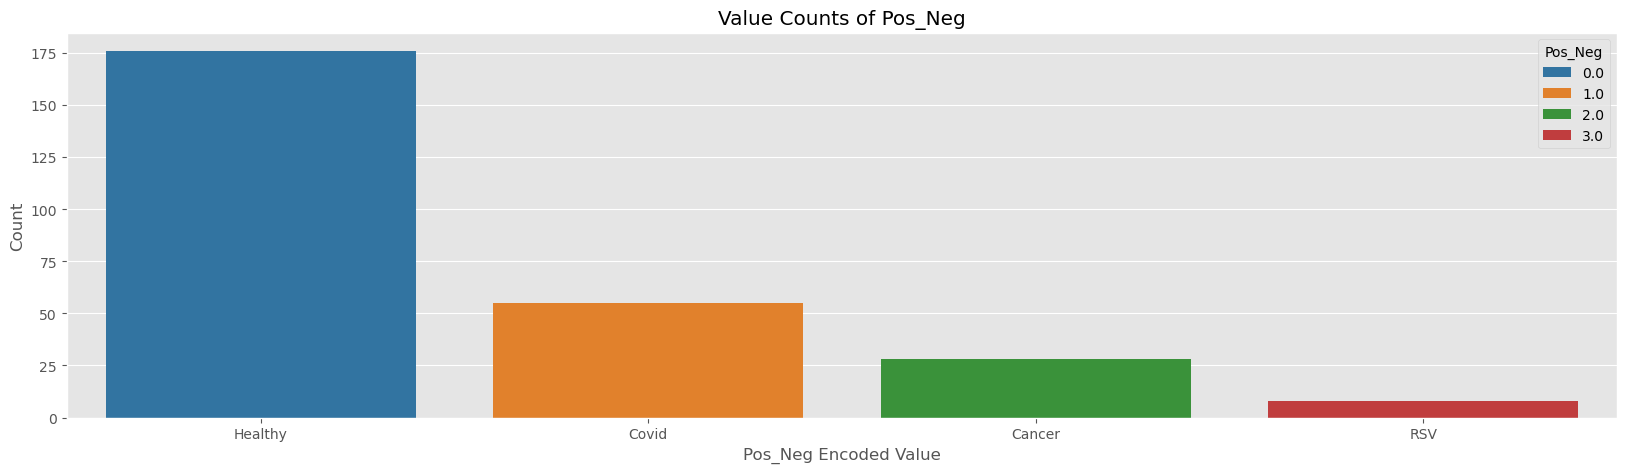

In [15]:
# Get value counts for the 'Pos_Neg' column
counts = df["Pos_Neg"].value_counts()

# Create a bar plot
sns.countplot(x="Pos_Neg", data=df, hue="Pos_Neg", palette="tab10")

plt.xticks(ticks=[0, 1, 2, 3], labels=["Healthy", "Covid", "Cancer","RSV"])
plt.title("Value Counts of Pos_Neg")
plt.xlabel("Pos_Neg Encoded Value")
plt.ylabel("Count")
plt.show()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def train_random_forest_loocv_with_metrics(dataset, target_col):
    """
    Train a Random Forest model using LOOCV with SMOTE, compute log loss,
    and evaluate with ROC AUC, accuracy, precision, recall, F1-score, and confusion matrix.
    It also plots the ROC curve (one-vs-rest for multi-class) and a bar chart of the metrics.

    Parameters:
    - dataset (DataFrame): Input dataset with features and target column.
    - target_col (str): Name of the target column.

    Returns:
    - models (list): List of trained RandomForestClassifier models (one per fold).
    - feature_importances (DataFrame): DataFrame with averaged feature importances.
    - predictions (list): List of arrays of predicted probabilities for the test set (per fold).
    - metrics (dict): Dictionary with overall computed metrics.
    """
    # Split dataset into features and target
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]
    classes = np.unique(y)
    
    # Initialize LOOCV
    loo = LeaveOneOut()
    importances_list = []
    models = []
    predictions = []
    fold_loglosses = []
    
    # LOOCV loop
    for fold, (train_index, test_index) in enumerate(loo.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to balance training data
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train_res, y_train_res)
        
        # Predict probabilities for the test sample
        proba = rf_model.predict_proba(X_test)
        predictions.append(proba)
        
        # Calculate log loss for this fold
        # fold_loss = log_loss(y_test, proba, labels=rf_model.classes_)
        # fold_loglosses.append(fold_loss)
        # print(f"Log Loss in fold {fold}: {fold_loss}")
        
        # Save feature importances and the model
        importances_list.append(rf_model.feature_importances_)
        models.append(rf_model)
    
    # Concatenate predicted probabilities from all folds
    all_proba = np.concatenate(predictions)  # shape (n_samples, n_classes)
    overall_logloss = log_loss(y, all_proba, labels=classes)
    print("Overall Log Loss across all folds:", overall_logloss)
    
    # Average feature importances over all folds
    avg_importances = np.mean(importances_list, axis=0)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": avg_importances
    }).sort_values(by="Importance", ascending=False)
    
    y_true = y.values
    # Binary classification: use positive class probability, Multi-class: use all probabilities
    if len(classes) == 2:
        # Extract probability for positive class (assumes positive is the second column)
        y_proba = np.concatenate([proba[:, 1] for proba in predictions])
        y_pred = (y_proba >= 0.5).astype(int)
        
        # Calculate ROC AUC for binary case
        roc_auc = roc_auc_score(y_true, y_proba)
        
        # Plot ROC Curve for binary case
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Binary Classification)")
        plt.legend(loc="lower right")
        plt.show()
    else:
        # For multi-class, use all probability outputs with ovr strategy
        roc_auc = roc_auc_score(y_true, all_proba, multi_class='ovr')
        # For ROC plotting, plot one curve per class (one-vs-rest)
        plt.figure(figsize=(8, 6))
        for i, cls in enumerate(classes):
            # Create binary labels for the current class vs the rest
            y_true_bin = (y_true == cls).astype(int)
            fpr, tpr, _ = roc_curve(y_true_bin, all_proba[:, i])
            auc_score = roc_auc_score(y_true_bin, all_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (One-vs-Rest, Multi-class)")
        plt.legend(loc="lower right")
        plt.show()
        # Use argmax to determine predictions in multi-class
        y_pred = np.argmax(all_proba, axis=1)
    
    # Calculate additional metrics
    acc = accuracy_score(y_true, y_pred)
    if len(classes) == 2:
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
    else:
        # For multi-class, use weighted averages
        prec = precision_score(y_true, y_pred, average='weighted')
        rec = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print("ROC AUC:", roc_auc)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [acc, prec, rec, f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Classification Metrics")
    plt.ylabel("Score")
    plt.show()
    
    # Package all computed metrics into a dictionary
    metrics = {
        "log_loss": overall_logloss,
        "roc_auc": roc_auc,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "confusion_matrix": conf_matrix
    }
    
    return feature_importances, metrics

Overall Log Loss across all folds: 0.0984013898536662


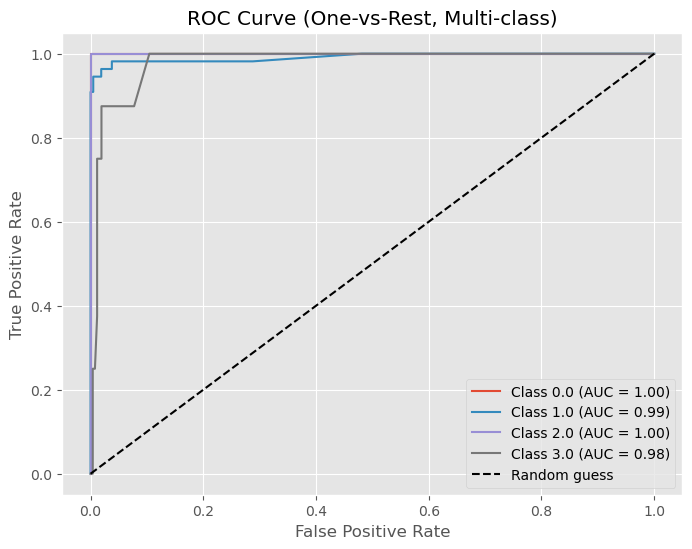

ROC AUC: 0.9928848338046452
Accuracy: 0.9737827715355806
Precision: 0.9722246144268947
Recall: 0.9737827715355806
F1-score: 0.9728176242920137
Confusion Matrix:
 [[176   0   0   0]
 [  0  52   0   3]
 [  0   0  28   0]
 [  3   1   0   4]]


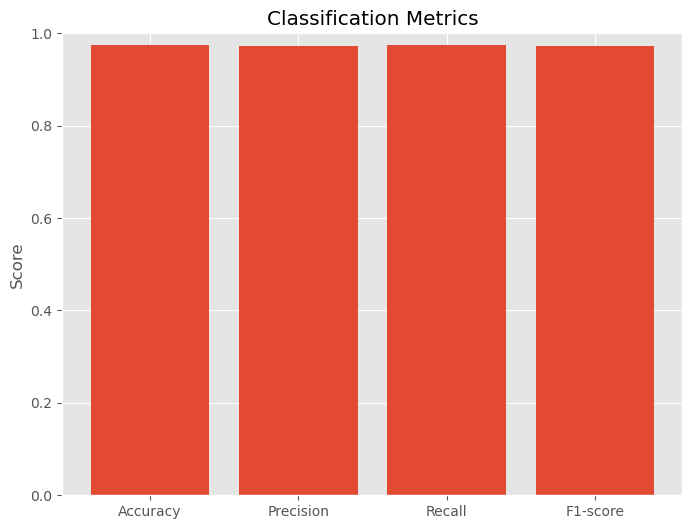

In [110]:

feat_importances, metrics = train_random_forest_loocv_with_metrics(df, "Pos_Neg")


In [111]:
# Display the random forest model output and feature importance
print("Random Forest Model:\n", feat_importances)

Random Forest Model:
       Feature  Importance
24       m027    0.049172
279      m235    0.030716
3    m015.580    0.026701
111  r_FeH3O2    0.025733
179  m143.900    0.025426
..        ...         ...
543      m484    0.000000
346      m290    0.000000
226      m190    0.000000
149      m118    0.000000
114      m092    0.000000

[560 rows x 2 columns]


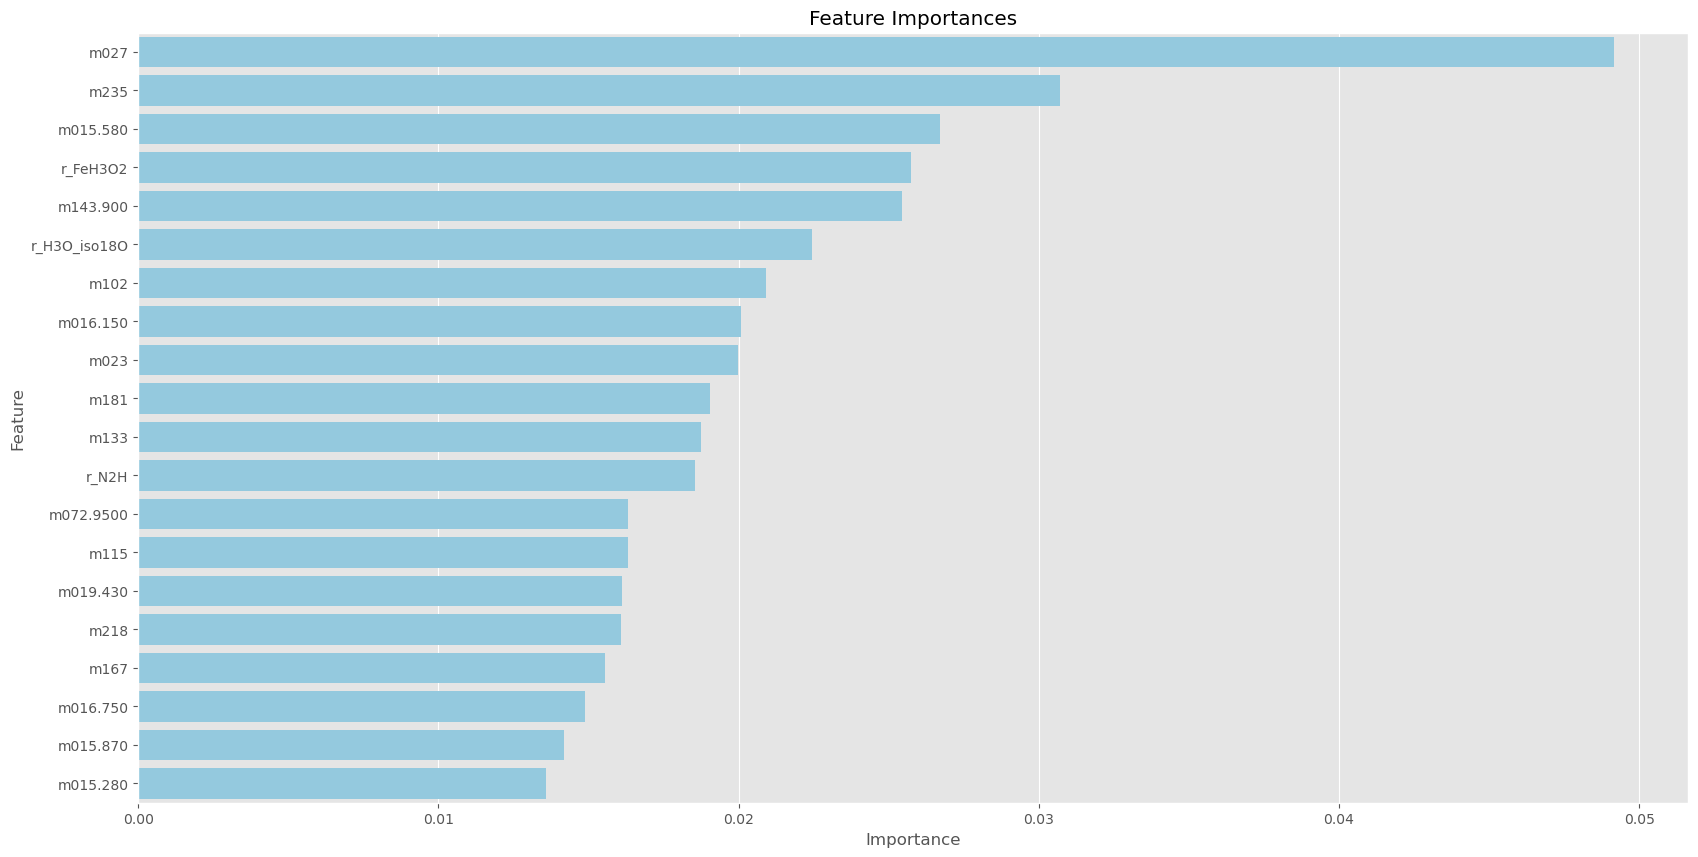

In [165]:
plt.figure(figsize=(20, 10))
sns.barplot(data=feat_importances[:20], y="Feature", x="Importance", color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

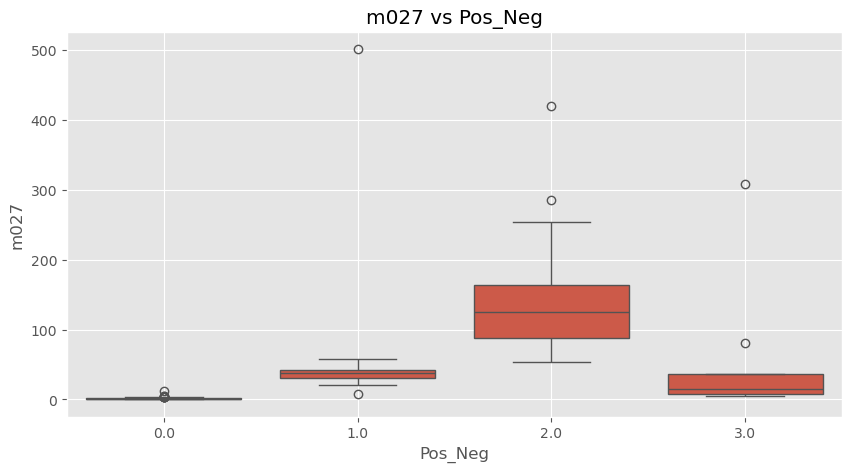

In [18]:
def plot_numerical_vs_categorical(df, categorical_variable):
    
    numerical_columns = df[["m027"]].columns

    for num_col in numerical_columns:
        plt.figure(figsize=(10, 5))

        sns.boxplot(x=df[categorical_variable], y=df[num_col])
        plt.title(f"{num_col} vs {categorical_variable}")
        plt.xlabel(categorical_variable)
        plt.ylabel(num_col)

        plt.xticks()
        plt.grid(True)

        plt.show()


# Call the function
plot_numerical_vs_categorical(df, "Pos_Neg")

In [29]:
def perform_pca(dataset, target_col):
    """
    Perform Principal Component Analysis (PCA) on the dataset, excluding specified columns.

    Parameters:
    - dataset (DataFrame): Input dataset with features.
    - exclude_cols (list): List of columns to exclude before performing PCA.

    Returns:
    - pca (PCA): Fitted PCA model.
    - pca_result (ndarray): Transformed dataset using the first principal component.
    """
    # Remove specified columns and perform PCA
    pca_dataset = dataset.drop(columns=target_col)
    pca = PCA(n_components=10)
    pca_result = pca.fit_transform(pca_dataset)


    # Plot cumulative explained variance
    plt.figure(figsize=(20, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs Number of Components')
    plt.show()


    # Plot the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
    
    return pca, pca_result

In [147]:
def perform_pca(dataset, target_col):
    """
    Perform Principal Component Analysis (PCA) on the dataset, excluding the target column(s).
    
    Parameters:
    - dataset (DataFrame): Input dataset with features.
    - target_col (str or list): Column name or list of column names that contain target classes.
    
    Returns:
    - pca (PCA): Fitted PCA model.
    - pca_result (ndarray): Transformed dataset using PCA.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.decomposition import PCA

    # If target_col is a list, use the first element for hue, but drop all target columns from features.
    if isinstance(target_col, list):
        hue_col = target_col[0]
        y = dataset[hue_col]
        X = dataset.drop(columns=target_col)
    else:
        hue_col = target_col
        y = dataset[target_col]
        X = dataset.drop(columns=[target_col])
    
    # Perform PCA on the features
    pca = PCA(n_components=10)
    pca_result = pca.fit_transform(X)
    
    # Plot cumulative explained variance
    plt.figure(figsize=(20, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs Number of Components')
    plt.show()
    
    # Plot the first two principal components with hue based on target classes
    plt.figure(figsize=(8, 6))
    unique_classes = y.unique()
    cmap = plt.get_cmap("Set1", len(unique_classes))
    for idx, cls in enumerate(unique_classes):
        indices = (y == cls)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1],
                    alpha=0.5, label=cls, color=cmap(idx))
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title=hue_col)
    plt.grid(True)
    plt.show()


    # Plot the first two principal components with hue based on target classes
    plt.figure(figsize=(8, 6))
    unique_classes = y.unique()
    cmap = plt.get_cmap("Set1", len(unique_classes))
    for idx, cls in enumerate(unique_classes):
        indices = (y == cls)
        plt.scatter(pca_result[indices, 1], pca_result[indices, 2],
                    alpha=0.5, label=cls, color=cmap(idx))
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.legend(title=hue_col)
    plt.grid(True)
    plt.show()


    # Plot the first two principal components with hue based on target classes
    plt.figure(figsize=(8, 6))
    unique_classes = y.unique()
    cmap = plt.get_cmap("Set1", len(unique_classes))
    for idx, cls in enumerate(unique_classes):
        indices = (y == cls)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 2],
                    alpha=0.5, label=cls, color=cmap(idx))
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 3')
    plt.legend(title=hue_col)
    plt.grid(True)
    plt.show()
    
    return pca, pca_result


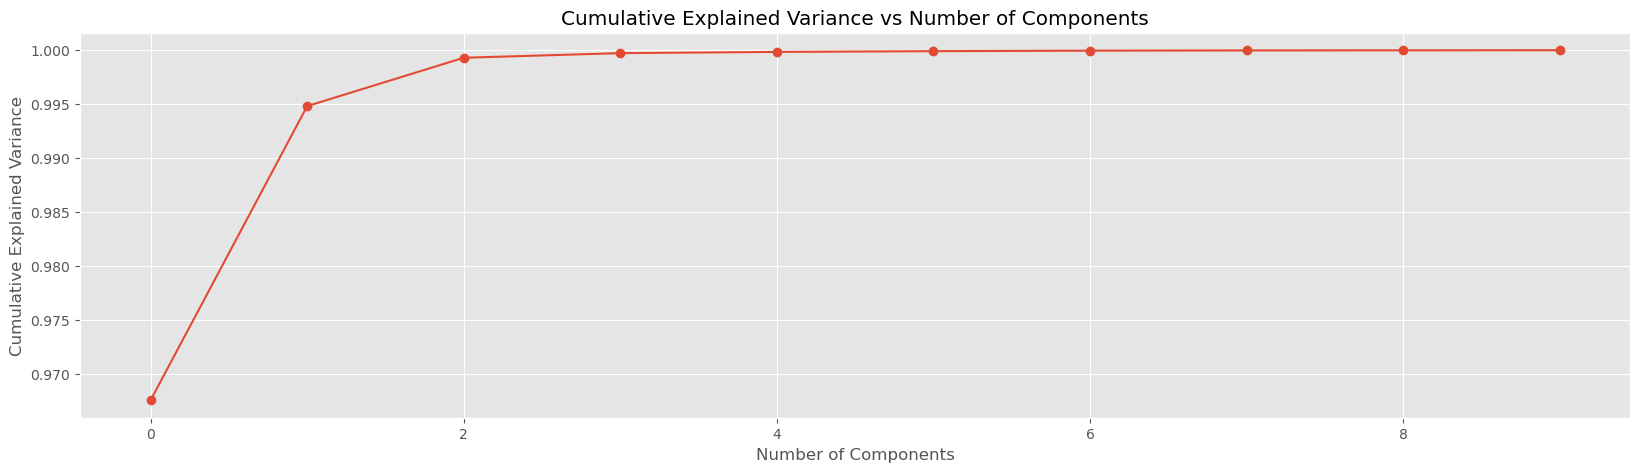

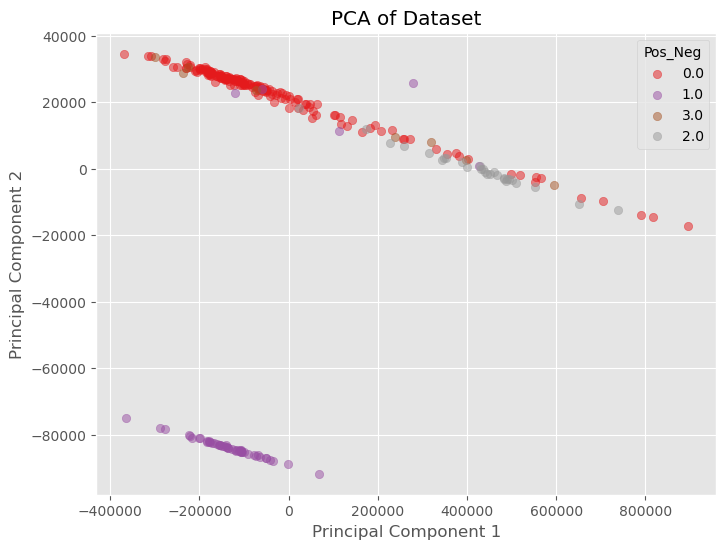

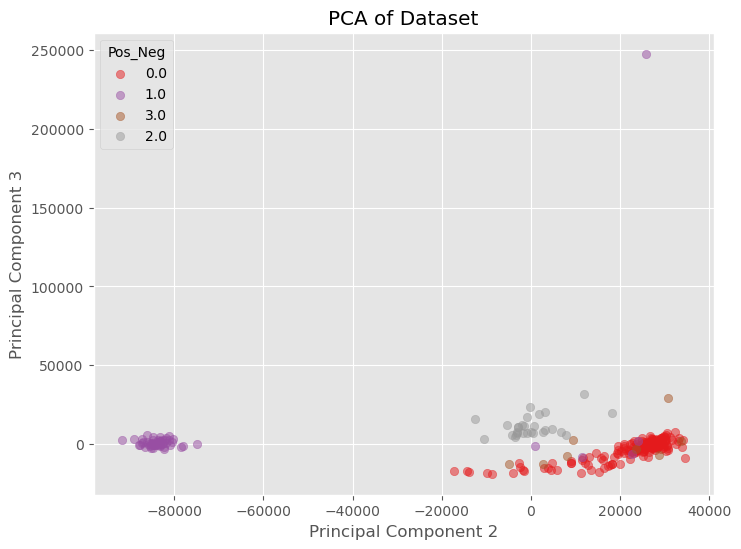

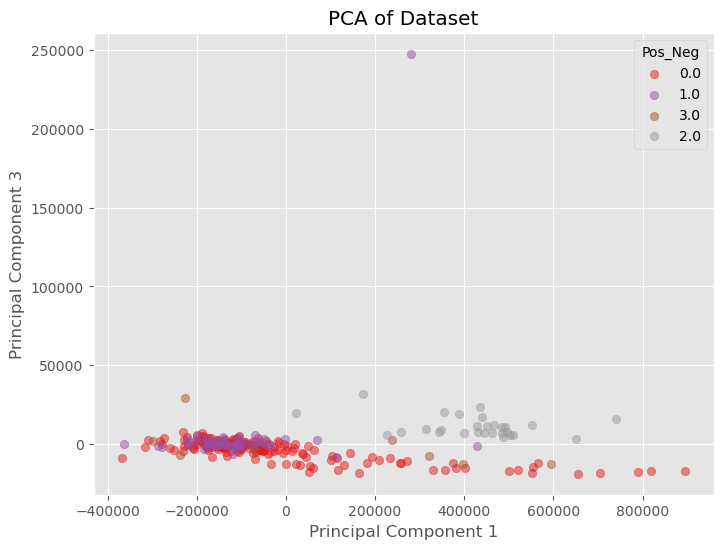

(PCA(n_components=10),
 array([[ 3.75667354e+05,  4.64685521e+03, -1.21997119e+04, ...,
          3.90217296e+02,  1.26974043e+03, -1.46010314e+02],
        [-4.49639129e+04,  2.41076030e+04,  1.83228705e+03, ...,
         -6.49483545e+02,  1.59878646e+02, -3.85227090e+02],
        [-1.83601017e+04,  2.30607933e+04,  2.02120788e+03, ...,
         -8.17336677e+02,  1.13966396e+03,  1.36588228e+03],
        ...,
        [-1.36509290e+05, -8.40479112e+04, -1.79620096e+02, ...,
          6.31878654e+01,  3.77538057e+02,  1.75785370e+03],
        [-1.04207529e+05, -8.53534540e+04, -1.48523219e+03, ...,
          1.24030687e+02,  2.76109877e+02,  9.12745473e+02],
        [-1.19451951e+05,  2.27585398e+04, -6.35344060e+03, ...,
          7.56280534e+02,  1.14138148e+03,  4.27235850e+01]]))

In [148]:
perform_pca(df, ["Pos_Neg"])

# Hyperparamter Tuning with rf

Original class distribution:
Pos_Neg
0.0    176
1.0     55
2.0     28
3.0      8
Name: count, dtype: int64
--------------------------------------------------
Fold 1:
  Log Loss: 0.0589, Accuracy: 0.9815, Precision: 0.8750, Recall: 0.9773, F1-Score: 0.9048, AUC-ROC: 1.0000
  Best Parameters: {'n_estimators': 220, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
--------------------------------------------------


/opt/anaconda3/envs/mlp_homeworks/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 2:
  Log Loss: 0.1411, Accuracy: 0.9630, Precision: 0.7222, Recall: 0.7500, F1-Score: 0.7356, AUC-ROC: 0.9712
  Best Parameters: {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
--------------------------------------------------
Fold 3:
  Log Loss: 0.0897, Accuracy: 0.9811, Precision: 0.9167, Recall: 0.9773, F1-Score: 0.9381, AUC-ROC: 0.9935
  Best Parameters: {'n_estimators': 220, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
--------------------------------------------------
Fold 4:
  Log Loss: 0.0588, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC-ROC: 1.0000
  Best Parameters: {'n_estimators': 360, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
--------------------------------------------------
Fold 5:
  Log Loss: 0.0749, Accuracy: 0.9811, Precision: 0.8750, Recall: 0.9773, F1-Score: 0.9048, AUC-ROC: 1.0000
  Best Par

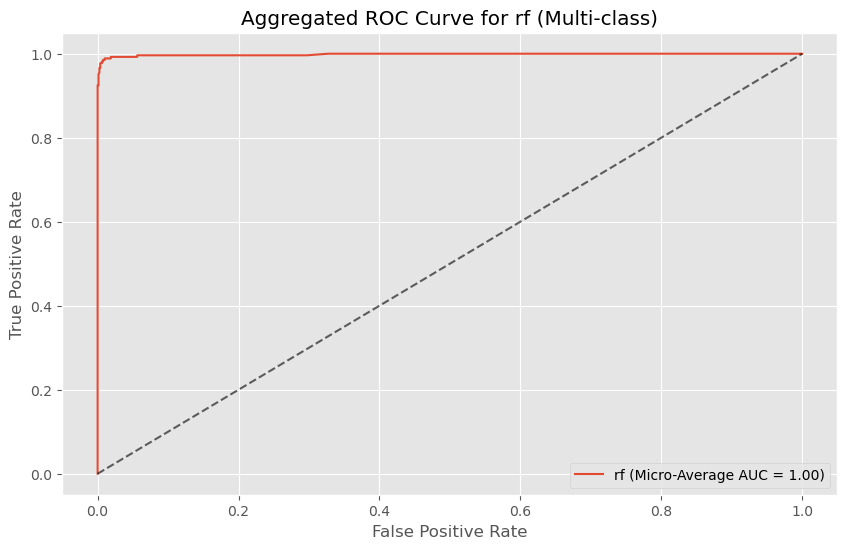

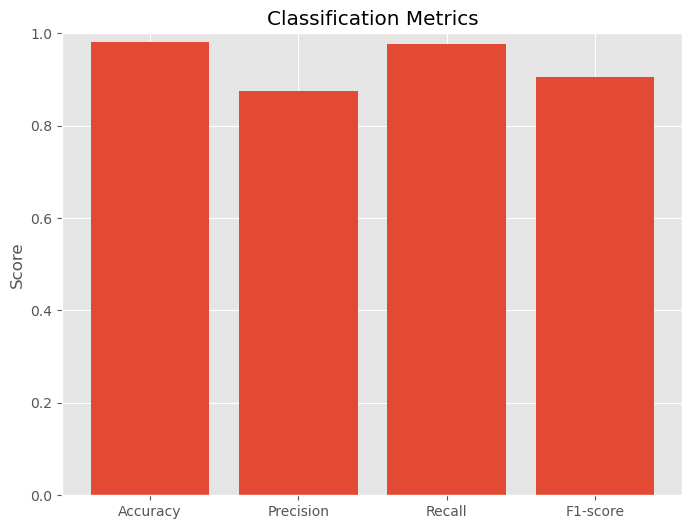

Best Parameters from the last fold:
{'n_estimators': 220, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Metrics DataFrame:
    Logloss  Logloss_Std  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  0.084699     0.030467  0.981342   0.877778  0.936364  0.896646  0.992926


In [32]:
def hyperparameter_tuning_rf_with_smote_kfold(df, target_column, seed):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score,
        log_loss,
        roc_curve,
        auc
    )
    from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
    from sklearn.preprocessing import StandardScaler, label_binarize
    from imblearn.over_sampling import SMOTE

    # Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    print("Original class distribution:")
    print(y.value_counts())
    print("-" * 50)

    # Define hyperparameter grid for rfClassifier
    param_grid = {
            "n_estimators": np.arange(50, 500, 10),
            "max_depth": [None, 10, 20, 30, 40, 50],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
        }

    # Define rf model
    model = RandomForestClassifier(random_state=seed)

    # Outer cross-validation using StratifiedKFold
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    # To store metrics and best parameters
    all_metrics = []
    best_params_list = []

    # For aggregating predictions across folds (for ROC curve)
    aggregated_y_true_list = []
    aggregated_y_proba_list = []

    # Outer KFold loop
    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), start=1):
        # Split the data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE on the training fold only
        smote = SMOTE(random_state=seed)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Standardize the features
        scaler = StandardScaler()
        X_train_res_scaled = scaler.fit_transform(X_train_res)
        X_test_scaled = scaler.transform(X_test)

        # Hyperparameter tuning using RandomizedSearchCV (inner CV)
        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_grid,
            n_iter=50,
            cv=3,  # inner CV
            scoring="neg_log_loss",
            n_jobs=-1,
            random_state=seed,
        )
        random_search.fit(X_train_res_scaled, y_train_res)
        best_estimator = random_search.best_estimator_
        best_params_list.append(random_search.best_params_)

        # Evaluate on the outer test fold
        y_pred = best_estimator.predict(X_test_scaled)
        y_proba = best_estimator.predict_proba(X_test_scaled)

        # For multi-class, use macro averaging
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        roc_auc = roc_auc_score(
            y_test, y_proba, multi_class='ovr', average='macro'
        )
        ll = log_loss(y_test, y_proba)

        all_metrics.append([ll, acc, prec, rec, f1, roc_auc])

        # Save predictions and true labels for ROC curve plotting later
        aggregated_y_true_list.append(y_test.to_numpy())
        aggregated_y_proba_list.append(y_proba)

        print(f"Fold {fold}:")
        print(f"  Log Loss: {ll:.4f}, Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")
        print(f"  Best Parameters: {random_search.best_params_}")
        print("-" * 50)

    # Compute average metrics across folds
    all_metrics = np.array(all_metrics)
    mean_ll = np.mean(all_metrics[:, 0])
    std_ll = np.std(all_metrics[:, 0])
    mean_acc = np.mean(all_metrics[:, 1])
    mean_prec = np.mean(all_metrics[:, 2])
    mean_rec = np.mean(all_metrics[:, 3])
    mean_f1 = np.mean(all_metrics[:, 4])
    mean_roc_auc = np.mean(all_metrics[:, 5])

    print("Average Metrics Across Folds:")
    print(f"  Avg Log Loss: {mean_ll:.4f} (Std: {std_ll:.4f})")
    print(f"  Avg Accuracy: {mean_acc:.4f}, Avg Precision: {mean_prec:.4f}, Avg Recall: {mean_rec:.4f}, Avg F1-Score: {mean_f1:.4f}, Avg AUC-ROC: {mean_roc_auc:.4f}")

    # Aggregate all predictions for ROC curve plotting
    aggregated_y_true = np.concatenate(aggregated_y_true_list)
    aggregated_y_proba = np.concatenate(aggregated_y_proba_list, axis=0)

    # Binarize the output for multi-class ROC curve (micro-average)
    classes = np.unique(aggregated_y_true)
    y_true_binarized = label_binarize(aggregated_y_true, classes=classes)
    # Compute micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), aggregated_y_proba.ravel())
    roc_auc_micro = auc(fpr, tpr)

    # Plot aggregated ROC curve for rf (micro-average)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"rf (Micro-Average AUC = {roc_auc_micro:.2f})")
    plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Aggregated ROC Curve for rf (Multi-class)")
    plt.legend()
    plt.show()


    # Plot metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [acc, prec, rec, f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Classification Metrics")
    plt.ylabel("Score")
    plt.show()

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(
        [[
            mean_ll,
            std_ll,
            mean_acc,
            mean_prec,
            mean_rec,
            mean_f1,
            mean_roc_auc,
        ]],
        columns=["Logloss", "Logloss_Std", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    )

    # Optionally, you can return the best parameters from the last fold
    return best_params_list[-1], metrics_df

# Usage example:
seed = 42
# Make sure your DataFrame 'df' and the target column are defined, and that the target has more than two classes.
best_params, metrics_df = hyperparameter_tuning_rf_with_smote_kfold(
    df, "Pos_Neg", seed
)
print("Best Parameters from the last fold:")
print(best_params)
print("\nMetrics DataFrame:")
print(metrics_df)


# Without Hyperparameter tuning, and Calculating feature importance

Original class distribution:
Pos_Neg
0.0    176
1.0     55
2.0     28
3.0      8
Name: count, dtype: int64
--------------------------------------------------
Fold 1:
  Log Loss: 0.0845, Accuracy: 0.9815, Precision: 0.8750, Recall: 0.9773, F1-Score: 0.9048, AUC-ROC: 1.0000
--------------------------------------------------
Fold 2:
  Log Loss: 0.7196, Accuracy: 0.9630, Precision: 0.7222, Recall: 0.7500, F1-Score: 0.7356, AUC-ROC: 0.9147
--------------------------------------------------
Fold 3:
  Log Loss: 0.1166, Accuracy: 0.9811, Precision: 0.9167, Recall: 0.9773, F1-Score: 0.9381, AUC-ROC: 0.9891
--------------------------------------------------
Fold 4:
  Log Loss: 0.0651, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC-ROC: 1.0000
--------------------------------------------------
Fold 5:
  Log Loss: 0.0880, Accuracy: 0.9811, Precision: 0.8750, Recall: 0.9773, F1-Score: 0.9048, AUC-ROC: 0.9952
--------------------------------------------------
Average Metr

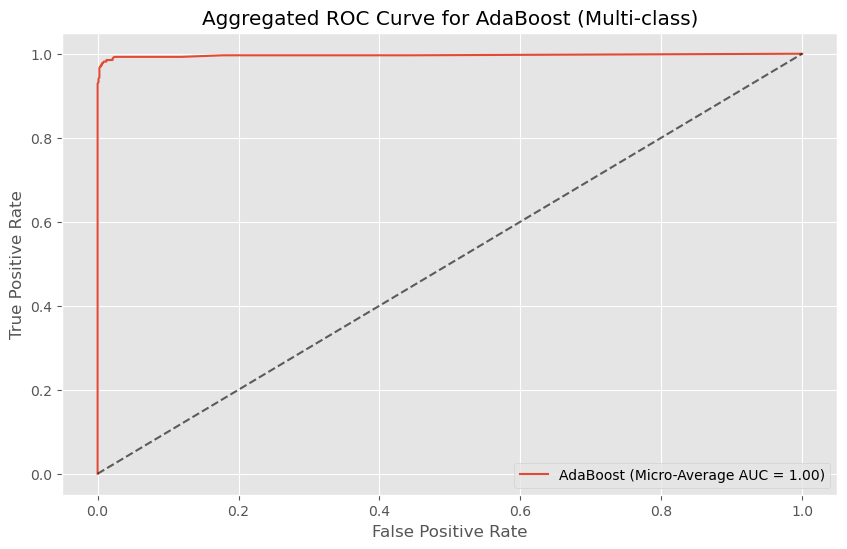

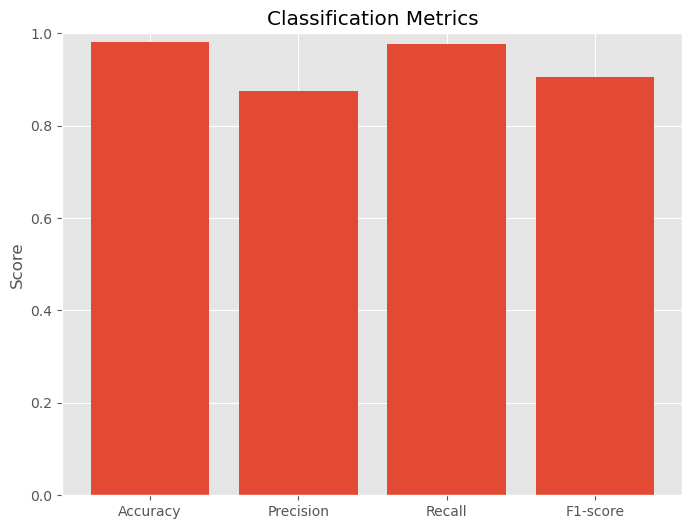


Metrics DataFrame:
    Logloss  Logloss_Std  Accuracy  Precision    Recall  F1-Score  AUC-ROC
0  0.214757     0.252963  0.981342   0.877778  0.936364  0.896646   0.9798


In [ ]:
def rf_with_smote_kfold(df, target_column, seed):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score,
        log_loss,
        roc_curve,
        auc
    )
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler, label_binarize
    from imblearn.over_sampling import SMOTE

    # Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    print("Original class distribution:")
    print(y.value_counts())
    print("-" * 50)

    # Define rf model with default parameters (or adjust as needed)
    model = RandomForestClassifier(random_state=42)

    # Outer cross-validation using StratifiedKFold
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    # To store metrics across folds
    all_metrics = []

    # For aggregating predictions across folds (for ROC curve)
    aggregated_y_true_list = []
    aggregated_y_proba_list = []
    feature_importances_list = []

    # Outer KFold loop
    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), start=1):
        # Split the data into training and test sets for this fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to the training data only
        smote = SMOTE(random_state=seed)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Standardize the features
        scaler = StandardScaler()
        X_train_res_scaled = scaler.fit_transform(X_train_res)
        X_test_scaled = scaler.transform(X_test)

        # Train rf on the resampled training set
        model.fit(X_train_res_scaled, y_train_res)

        # Predict on the test fold
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)

        # Store feature importances from the current fold
        feature_importances_list.append(model.feature_importances_)

        # Calculate metrics using macro averaging for multi-class
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        roc_auc = roc_auc_score(
            y_test, y_proba, multi_class='ovr', average="macro"
        )
        ll = log_loss(y_test, y_proba)

        all_metrics.append([ll, acc, prec, rec, f1, roc_auc])

        # Store predictions and true labels for ROC curve
        aggregated_y_true_list.append(y_test.to_numpy())
        aggregated_y_proba_list.append(y_proba)

        print(f"Fold {fold}:")
        print(f"  Log Loss: {ll:.4f}, Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")
        print("-" * 50)

    # Compute average metrics across folds
    all_metrics = np.array(all_metrics)
    mean_ll = np.mean(all_metrics[:, 0])
    std_ll = np.std(all_metrics[:, 0])
    mean_acc = np.mean(all_metrics[:, 1])
    mean_prec = np.mean(all_metrics[:, 2])
    mean_rec = np.mean(all_metrics[:, 3])
    mean_f1 = np.mean(all_metrics[:, 4])
    mean_roc_auc = np.mean(all_metrics[:, 5])

    print("Average Metrics Across Folds:")
    print(f"  Avg Log Loss: {mean_ll:.4f} (Std: {std_ll:.4f})")
    print(f"  Avg Accuracy: {mean_acc:.4f}, Avg Precision: {mean_prec:.4f}, Avg Recall: {mean_rec:.4f}, Avg F1-Score: {mean_f1:.4f}, Avg AUC-ROC: {mean_roc_auc:.4f}")

    avg_feature_importances = np.mean(feature_importances_list, axis=0)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": avg_feature_importances
        }).sort_values(by="Importance", ascending=False)
    
    # Aggregate predictions for ROC curve plotting
    aggregated_y_true = np.concatenate(aggregated_y_true_list)
    aggregated_y_proba = np.concatenate(aggregated_y_proba_list, axis=0)

    # Binarize true labels for multi-class ROC (micro-average)
    classes = np.unique(aggregated_y_true)
    y_true_binarized = label_binarize(aggregated_y_true, classes=classes)
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), aggregated_y_proba.ravel())
    roc_auc_micro = auc(fpr, tpr)

    # Plot aggregated ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"rf (Micro-Average AUC = {roc_auc_micro:.2f})")
    plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Aggregated ROC Curve for rf (Multi-class)")
    plt.legend()
    plt.show()


    # Plot metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [acc, prec, rec, f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Classification Metrics")
    plt.ylabel("Score")
    plt.show()

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(
        [[
            mean_ll,
            std_ll,
            mean_acc,
            mean_prec,
            mean_rec,
            mean_f1,
            mean_roc_auc,
        ]],
        columns=["Logloss", "Logloss_Std", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    )

    return feature_importances, metrics_df


# Usage example:
seed = 42
# Make sure your DataFrame 'df' and the target column are defined, and that the target has more than two classes.
feature_importances, metrics_df = rf_with_smote_kfold(
    df, "Pos_Neg", seed
)
print("\nMetrics DataFrame:")
print(metrics_df)


In [26]:
# Display the random forest model output and feature importance
print("Random Forest Model:\n", feature_importances)

Random Forest Model:
       Feature  Importance
24       m027    0.041520
111  r_FeH3O2    0.025158
217      m181    0.024762
3    m015.580    0.024655
279      m235    0.022105
..        ...         ...
481      m422    0.000000
480      m421    0.000000
390  m332.900    0.000000
273      m230    0.000000
376      m320    0.000000

[560 rows x 2 columns]


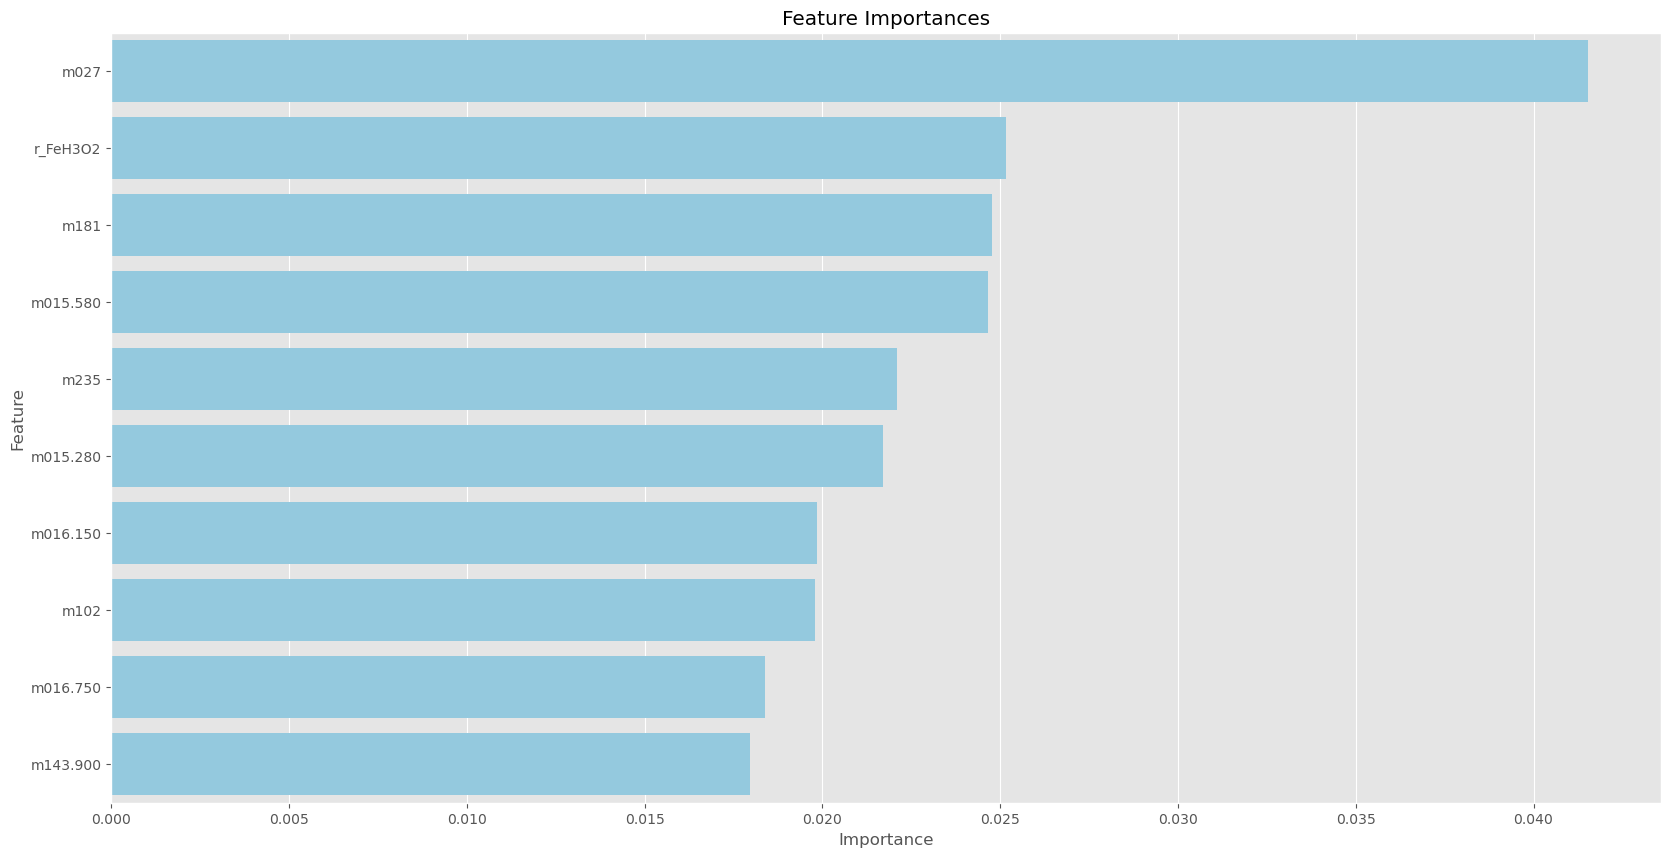

In [28]:
plt.figure(figsize=(20, 10))
sns.barplot(data=feature_importances[:10], y="Feature", x="Importance", color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## First model is modified to make the metric calculation of folds inside the loop itself

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    log_loss, roc_auc_score, roc_curve, accuracy_score, 
    precision_score, recall_score, f1_score, confusion_matrix
)

def train_random_forest_loocv_with_metrics(dataset, target_col):
    """
    Train a Random Forest model using LOOCV with SMOTE.
    
    For each fold, the model is trained, the test sample's predicted probabilities
    are obtained, and metrics are computed (log loss, accuracy, precision, recall, F1-score,
    and confusion matrix). After processing all folds, the predictions are aggregated and
    overall (aggregated) metrics are computed both from the aggregated predictions and as 
    the average of per-fold metrics.
    
    ROC curves are plotted:
      - For binary classification, a single ROC curve (using the positive class probability).
      - For multi-class, one curve per class (one-vs-rest).
    
    A bar chart of the aggregated metrics is also plotted.
    
    Parameters:
    - dataset (DataFrame): Input dataset with features and target column.
    - target_col (str): Name of the target column.
    
    Returns:
    - models (list): List of trained RandomForestClassifier models (one per fold).
    - feature_importances (DataFrame): DataFrame with averaged feature importances.
    - fold_metrics (list): List of dictionaries containing metrics computed for each fold.
    - aggregated_metrics (dict): Dictionary with overall aggregated metrics.
    - predictions (list): List of arrays of predicted probabilities for the test set (per fold).
    """
    # Split dataset into features and target
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]
    classes = np.unique(y)
    
    # Initialize LOOCV and storage variables
    loo = LeaveOneOut()
    importances_list = []
    models = []
    predictions = []
    fold_metrics = []  # List to store metrics for each fold
    
    # LOOCV loop
    for fold, (train_index, test_index) in enumerate(loo.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to balance training data
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train_res, y_train_res)
        
        # Predict probabilities for the test sample (shape: (1, n_classes))
        proba = rf_model.predict_proba(X_test)
        predictions.append(proba)
        
        # Save feature importances and the model
        importances_list.append(rf_model.feature_importances_)
        models.append(rf_model)
        
        # Compute per-fold metrics using the single test sample
        # Convert y_test to a list for metric functions
        y_true_fold = [y_test.values[0]]
        if len(classes) == 2:
            # For binary, threshold the positive class probability (assumed to be column 1)
            y_pred_fold = int(proba[0, 1] >= 0.5)
        else:
            # For multi-class, select class with highest probability
            y_pred_fold = int(np.argmax(proba, axis=1)[0])
            
        fold_logloss = log_loss(y_true_fold, proba, labels=classes)
        fold_accuracy = accuracy_score(y_true_fold, [y_pred_fold])
        if len(classes) == 2:
            fold_precision = precision_score(y_true_fold, [y_pred_fold], zero_division=0)
            fold_recall = recall_score(y_true_fold, [y_pred_fold], zero_division=0)
            fold_f1 = f1_score(y_true_fold, [y_pred_fold], zero_division=0)
        else:
            fold_precision = precision_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
            fold_recall = recall_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
            fold_f1 = f1_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
        fold_conf_matrix = confusion_matrix(y_true_fold, [y_pred_fold], labels=classes)
        
        fold_metrics.append({
            "log_loss": fold_logloss,
            "accuracy": fold_accuracy,
            "precision": fold_precision,
            "recall": fold_recall,
            "f1_score": fold_f1,
            "confusion_matrix": fold_conf_matrix
        })
        print(f"Fold {fold} metrics: Log Loss={fold_logloss:.4f}, Accuracy={fold_accuracy:.4f}, "
              f"Precision={fold_precision:.4f}, Recall={fold_recall:.4f}, F1-score={fold_f1:.4f}")
    
    # Concatenate predicted probabilities from all folds
    all_proba = np.concatenate(predictions)  # shape (n_samples, n_classes)
    
    # Compute aggregated metrics based on concatenated predictions
    overall_logloss = log_loss(y, all_proba, labels=classes)
    if len(classes) == 2:
        # For binary: extract positive class probabilities and compute predictions using threshold 0.5
        y_proba_all = np.array([proba[0, 1] for proba in predictions])
        y_pred_all = (y_proba_all >= 0.5).astype(int)
        aggregated_roc_auc = roc_auc_score(y, y_proba_all)
    else:
        y_pred_all = np.argmax(all_proba, axis=1)
        aggregated_roc_auc = roc_auc_score(y, all_proba, multi_class='ovr')
    
    aggregated_accuracy = accuracy_score(y, y_pred_all)
    if len(classes) == 2:
        aggregated_precision = precision_score(y, y_pred_all, zero_division=0)
        aggregated_recall = recall_score(y, y_pred_all, zero_division=0)
        aggregated_f1 = f1_score(y, y_pred_all, zero_division=0)
    else:
        aggregated_precision = precision_score(y, y_pred_all, average='weighted', zero_division=0)
        aggregated_recall = recall_score(y, y_pred_all, average='weighted', zero_division=0)
        aggregated_f1 = f1_score(y, y_pred_all, average='weighted', zero_division=0)
    
    # Sum the confusion matrices from all folds element-wise
    aggregated_conf_matrix = np.sum(np.array([m['confusion_matrix'] for m in fold_metrics]), axis=0)
    
    # Print aggregated metrics
    print("\nAggregated Metrics:")
    print("Overall Log Loss:", overall_logloss)
    print("Aggregated ROC AUC:", aggregated_roc_auc)
    print("Aggregated Accuracy:", aggregated_accuracy)
    print("Aggregated Precision:", aggregated_precision)
    print("Aggregated Recall:", aggregated_recall)
    print("Aggregated F1-score:", aggregated_f1)
    print("Aggregated Confusion Matrix:\n", aggregated_conf_matrix)
    
    # Plot ROC Curve
    if len(classes) == 2:
        fpr, tpr, _ = roc_curve(y, y_proba_all)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {aggregated_roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Binary Classification)")
        plt.legend(loc="lower right")
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        for i, cls in enumerate(classes):
            # One-vs-rest ROC for each class
            y_true_bin = (y == cls).astype(int)
            fpr, tpr, _ = roc_curve(y_true_bin, all_proba[:, i])
            auc_score = roc_auc_score(y_true_bin, all_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (One-vs-Rest, Multi-class)")
        plt.legend(loc="lower right")
        plt.show()
    
    # Plot aggregated classification metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [aggregated_accuracy, aggregated_precision, aggregated_recall, aggregated_f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Aggregated Classification Metrics")
    plt.ylabel("Score")
    plt.show()
    
    # Package aggregated metrics into a dictionary
    aggregated_metrics = {
        "log_loss": overall_logloss,
        "roc_auc": aggregated_roc_auc,
        "accuracy": aggregated_accuracy,
        "precision": aggregated_precision,
        "recall": aggregated_recall,
        "f1_score": aggregated_f1,
        "confusion_matrix": aggregated_conf_matrix
    }
    
    return models, feature_importances, fold_metrics, aggregated_metrics, predictions

# Compute averaged feature importances over all folds
# (This can be done after the loop, even before plotting aggregated metrics.)
def compute_feature_importances(X, importances_list):
    avg_importances = np.mean(importances_list, axis=0)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": avg_importances
    }).sort_values(by="Importance", ascending=False)
    return feature_importances


Fold 1 metrics: Log Loss=0.0202, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 2 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 3 metrics: Log Loss=0.0834, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 4 metrics: Log Loss=0.0202, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 5 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 6 metrics: Log Loss=0.0726, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 7 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 8 metrics: Log Loss=0.0305, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 9 metrics: Log Loss=0.0101, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 10 metrics: Log Loss=0.1054, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 11 m

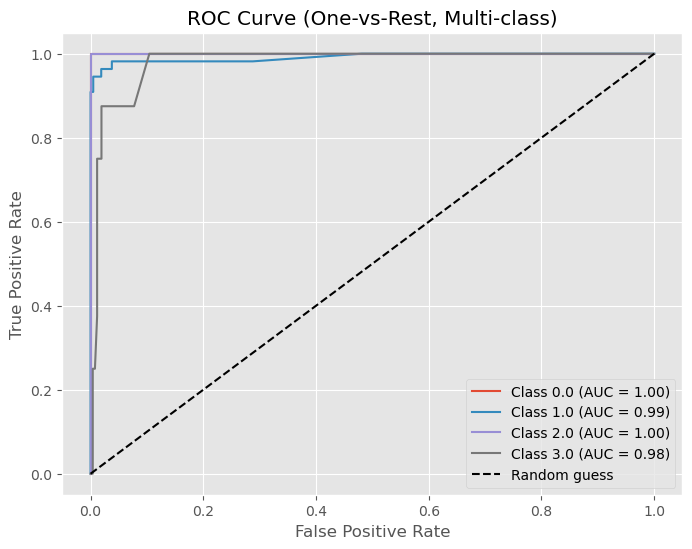

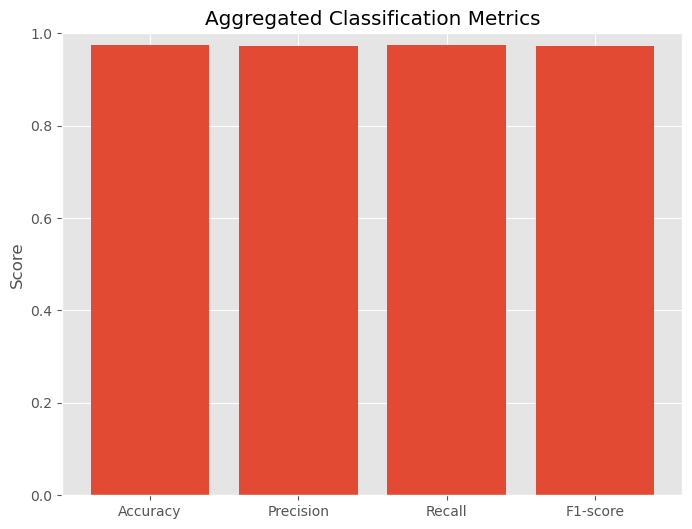

([RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomFor

In [40]:
train_random_forest_loocv_with_metrics(df,"Pos_Neg")

## This is only multiclass, it doesnt have if conditions like previous

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    log_loss, roc_auc_score, roc_curve, accuracy_score, 
    precision_score, recall_score, f1_score, confusion_matrix
)

def train_random_forest_loocv_with_metrics(dataset, target_col):
    """
    Train a Random Forest model using LOOCV with SMOTE for multi-class classification.
    
    For each fold, the model is trained, the test sample's predicted probabilities
    are obtained, and metrics are computed (log loss, accuracy, precision, recall, F1-score,
    and confusion matrix). After processing all folds, the predictions are aggregated and
    overall (aggregated) metrics are computed both from the aggregated predictions and as 
    the average of per-fold metrics.
    
    ROC curves are plotted for multi-class (one-vs-rest for each class) and an aggregated 
    metrics bar chart is displayed.
    
    Parameters:
    - dataset (DataFrame): Input dataset with features and target column.
    - target_col (str): Name of the target column.
    
    Returns:
    - models (list): List of trained RandomForestClassifier models (one per fold).
    - feature_importances (DataFrame): DataFrame with averaged feature importances.
    - fold_metrics (list): List of dictionaries containing metrics computed for each fold.
    - aggregated_metrics (dict): Dictionary with overall aggregated metrics.
    - predictions (list): List of arrays of predicted probabilities for the test set (per fold).
    """
    # Split dataset into features and target
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]
    classes = np.unique(y)
    
    # Initialize LOOCV and storage variables
    loo = LeaveOneOut()
    importances_list = []
    models = []
    predictions = []
    fold_metrics = []  # List to store metrics for each fold
    
    # LOOCV loop (multi-class only)
    for fold, (train_index, test_index) in enumerate(loo.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to balance training data
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train_res, y_train_res)
        
        # Predict probabilities for the test sample (shape: (1, n_classes))
        proba = rf_model.predict_proba(X_test)
        predictions.append(proba)
        
        # Save feature importances and the model
        importances_list.append(rf_model.feature_importances_)
        models.append(rf_model)
        
        # For multi-class, select class with highest probability
        y_pred_fold = int(np.argmax(proba, axis=1)[0])
        y_true_fold = [y_test.values[0]]
        
        # Compute per-fold metrics (using weighted averaging)
        fold_logloss = log_loss(y_true_fold, proba, labels=classes)
        fold_accuracy = accuracy_score(y_true_fold, [y_pred_fold])
        fold_precision = precision_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
        fold_recall = recall_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
        fold_f1 = f1_score(y_true_fold, [y_pred_fold], average='weighted', zero_division=0)
        fold_conf_matrix = confusion_matrix(y_true_fold, [y_pred_fold], labels=classes)
        
        fold_metrics.append({
            "log_loss": fold_logloss,
            "accuracy": fold_accuracy,
            "precision": fold_precision,
            "recall": fold_recall,
            "f1_score": fold_f1,
            "confusion_matrix": fold_conf_matrix
        })
        print(f"Fold {fold} metrics: Log Loss={fold_logloss:.4f}, Accuracy={fold_accuracy:.4f}, "
              f"Precision={fold_precision:.4f}, Recall={fold_recall:.4f}, F1-score={fold_f1:.4f}")
    
    # Concatenate predicted probabilities from all folds
    all_proba = np.concatenate(predictions)  # shape (n_samples, n_classes)
    
    # Compute aggregated metrics based on concatenated predictions (multi-class only)
    overall_logloss = log_loss(y, all_proba, labels=classes)
    y_pred_all = np.argmax(all_proba, axis=1)
    aggregated_roc_auc = roc_auc_score(y, all_proba, multi_class='ovr')
    aggregated_accuracy = accuracy_score(y, y_pred_all)
    aggregated_precision = precision_score(y, y_pred_all, average='weighted', zero_division=0)
    aggregated_recall = recall_score(y, y_pred_all, average='weighted', zero_division=0)
    aggregated_f1 = f1_score(y, y_pred_all, average='weighted', zero_division=0)
    
    # Sum the confusion matrices from all folds element-wise
    aggregated_conf_matrix = np.sum(np.array([m['confusion_matrix'] for m in fold_metrics]), axis=0)
    
    # Print aggregated metrics
    print("\nAggregated Metrics:")
    print("Overall Log Loss:", overall_logloss)
    print("Aggregated ROC AUC:", aggregated_roc_auc)
    print("Aggregated Accuracy:", aggregated_accuracy)
    print("Aggregated Precision:", aggregated_precision)
    print("Aggregated Recall:", aggregated_recall)
    print("Aggregated F1-score:", aggregated_f1)
    print("Aggregated Confusion Matrix:\n", aggregated_conf_matrix)
    
    # Plot ROC Curve (one-vs-rest for each class)
    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(classes):
        y_true_bin = (y == cls).astype(int)
        fpr, tpr, _ = roc_curve(y_true_bin, all_proba[:, i])
        auc_score = roc_auc_score(y_true_bin, all_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (One-vs-Rest, Multi-class)")
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot aggregated classification metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [aggregated_accuracy, aggregated_precision, aggregated_recall, aggregated_f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Aggregated Classification Metrics")
    plt.ylabel("Score")
    plt.show()
    
    # Package aggregated metrics into a dictionary
    aggregated_metrics = {
        "log_loss": overall_logloss,
        "roc_auc": aggregated_roc_auc,
        "accuracy": aggregated_accuracy,
        "precision": aggregated_precision,
        "recall": aggregated_recall,
        "f1_score": aggregated_f1,
        "confusion_matrix": aggregated_conf_matrix
    }
    
    # Compute averaged feature importances over all folds
    feature_importances = compute_feature_importances(X, importances_list)
    
    return models, feature_importances, fold_metrics, aggregated_metrics, predictions

def compute_feature_importances(X, importances_list):
    """
    Compute and return averaged feature importances as a DataFrame.
    """
    avg_importances = np.mean(importances_list, axis=0)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": avg_importances
    }).sort_values(by="Importance", ascending=False)
    return feature_importances


Fold 1 metrics: Log Loss=0.0202, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 2 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 3 metrics: Log Loss=0.0834, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 4 metrics: Log Loss=0.0202, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 5 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 6 metrics: Log Loss=0.0726, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 7 metrics: Log Loss=0.0000, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 8 metrics: Log Loss=0.0305, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 9 metrics: Log Loss=0.0101, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 10 metrics: Log Loss=0.1054, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 11 m

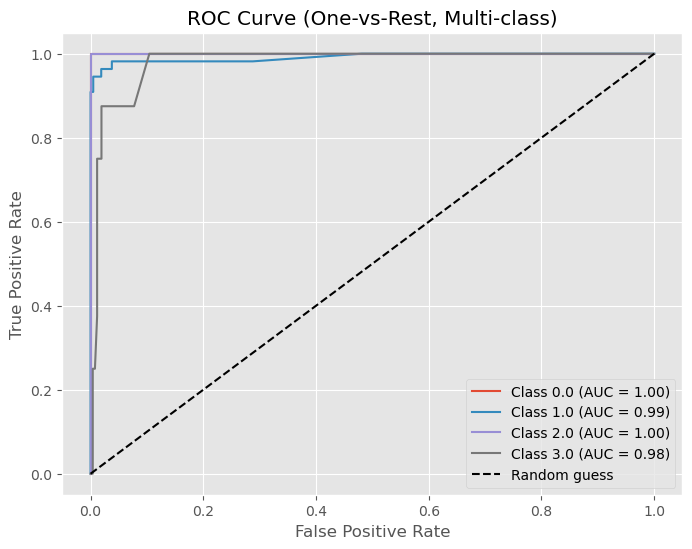

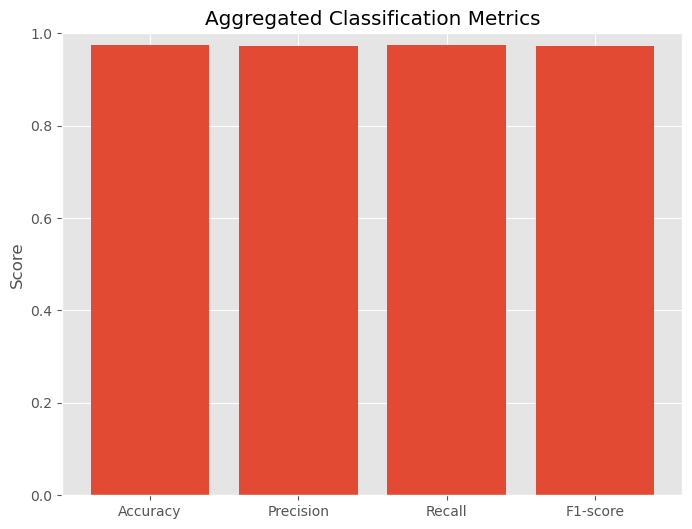

([RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomFor

In [46]:
train_random_forest_loocv_with_metrics(df,"Pos_Neg")

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    log_loss, roc_auc_score, roc_curve, accuracy_score, 
    precision_score, recall_score, f1_score, confusion_matrix
)

def train_random_forest_kfold_with_metrics(dataset, target_col, n_splits=5):
    """
    Train a Random Forest model using K-Fold cross-validation with SMOTE for multi-class classification.
    
    For each fold, the model is trained, the test set's predicted probabilities
    are obtained, and metrics are computed (log loss, accuracy, precision, recall, F1-score,
    and confusion matrix). After processing all folds, the predictions are aggregated and
    overall (aggregated) metrics are computed both from the aggregated predictions and as 
    the average of per-fold metrics.
    
    ROC curves are plotted for multi-class (one-vs-rest for each class) and an aggregated 
    metrics bar chart is displayed.
    
    Parameters:
    - dataset (DataFrame): Input dataset with features and target column.
    - target_col (str): Name of the target column.
    - n_splits (int): Number of folds for cross-validation (default is 5).
    
    Returns:
    - models (list): List of trained RandomForestClassifier models (one per fold).
    - feature_importances (DataFrame): DataFrame with averaged feature importances.
    - fold_metrics (list): List of dictionaries containing metrics computed for each fold.
    - aggregated_metrics (dict): Dictionary with overall aggregated metrics.
    - predictions (list): List of arrays of predicted probabilities for each fold's test set.
    """
    # Split dataset into features and target
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]
    classes = np.unique(y)
    
    # Initialize Stratified K-Fold CV to maintain class balance
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    models = []
    fold_metrics = []   # To store metrics for each fold
    predictions = []    # To store predicted probabilities per fold
    y_true_all = []     # To store true labels per fold (for aggregated metrics)
    importances_list = []  # To store feature importances per fold
    
    # K-Fold cross-validation loop
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to balance the training data
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # Train RandomForestClassifier on the resampled training set
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train_res, y_train_res)
        
        # Predict probabilities for the test set (can have multiple samples)
        proba = rf_model.predict_proba(X_test)
        predictions.append(proba)
        y_true_all.append(y_test.values)
        
        # Save feature importances and the trained model
        importances_list.append(rf_model.feature_importances_)
        models.append(rf_model)
        
        # Compute predicted classes for the test set
        y_pred_fold = np.argmax(proba, axis=1)
        
        # Compute per-fold metrics
        fold_logloss = log_loss(y_test, proba, labels=classes)
        fold_accuracy = accuracy_score(y_test, y_pred_fold)
        fold_precision = precision_score(y_test, y_pred_fold, average='weighted', zero_division=0)
        fold_recall = recall_score(y_test, y_pred_fold, average='weighted', zero_division=0)
        fold_f1 = f1_score(y_test, y_pred_fold, average='weighted', zero_division=0)
        fold_conf_matrix = confusion_matrix(y_test, y_pred_fold, labels=classes)
        
        fold_metrics.append({
            "log_loss": fold_logloss,
            "accuracy": fold_accuracy,
            "precision": fold_precision,
            "recall": fold_recall,
            "f1_score": fold_f1,
            "confusion_matrix": fold_conf_matrix
        })
        
        print(f"Fold {fold} metrics: Log Loss={fold_logloss:.4f}, Accuracy={fold_accuracy:.4f}, "
              f"Precision={fold_precision:.4f}, Recall={fold_recall:.4f}, F1-score={fold_f1:.4f}")
    
    # Concatenate predictions and true labels from all folds
    all_proba = np.concatenate(predictions, axis=0)  # shape (n_samples, n_classes)
    y_true_agg = np.concatenate(y_true_all, axis=0)
    
    # Compute aggregated metrics
    overall_logloss = log_loss(y_true_agg, all_proba, labels=classes)
    y_pred_all = np.argmax(all_proba, axis=1)
    aggregated_roc_auc = roc_auc_score(y_true_agg, all_proba, multi_class='ovr')
    aggregated_accuracy = accuracy_score(y_true_agg, y_pred_all)
    aggregated_precision = precision_score(y_true_agg, y_pred_all, average='weighted', zero_division=0)
    aggregated_recall = recall_score(y_true_agg, y_pred_all, average='weighted', zero_division=0)
    aggregated_f1 = f1_score(y_true_agg, y_pred_all, average='weighted', zero_division=0)
    
    # Sum the confusion matrices from all folds element-wise
    aggregated_conf_matrix = np.sum(np.array([m['confusion_matrix'] for m in fold_metrics]), axis=0)
    
    print("\nAggregated Metrics:")
    print("Overall Log Loss:", overall_logloss)
    print("Aggregated ROC AUC:", aggregated_roc_auc)
    print("Aggregated Accuracy:", aggregated_accuracy)
    print("Aggregated Precision:", aggregated_precision)
    print("Aggregated Recall:", aggregated_recall)
    print("Aggregated F1-score:", aggregated_f1)
    print("Aggregated Confusion Matrix:\n", aggregated_conf_matrix)
    
    # Plot ROC Curve (one-vs-rest for each class)
    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(classes):
        # Binarize the true labels for the current class
        y_true_bin = (y_true_agg == cls).astype(int)
        fpr, tpr, _ = roc_curve(y_true_bin, all_proba[:, i])
        auc_score = roc_auc_score(y_true_bin, all_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (One-vs-Rest, Multi-class)")
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot aggregated classification metrics as a bar chart
    metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    metrics_values = [aggregated_accuracy, aggregated_precision, aggregated_recall, aggregated_f1]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values)
    plt.ylim([0, 1])
    plt.title("Aggregated Classification Metrics")
    plt.ylabel("Score")
    plt.show()
    
    # Package aggregated metrics into a dictionary
    aggregated_metrics = {
        "log_loss": overall_logloss,
        "roc_auc": aggregated_roc_auc,
        "accuracy": aggregated_accuracy,
        "precision": aggregated_precision,
        "recall": aggregated_recall,
        "f1_score": aggregated_f1,
        "confusion_matrix": aggregated_conf_matrix
    }
    
    # Compute averaged feature importances over all folds
    feature_importances = compute_feature_importances(X, importances_list)
    
    return models, feature_importances, fold_metrics, aggregated_metrics, predictions

def compute_feature_importances(X, importances_list):
    """
    Compute and return averaged feature importances as a DataFrame.
    """
    avg_importances = np.mean(importances_list, axis=0)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": avg_importances
    }).sort_values(by="Importance", ascending=False)
    return feature_importances


Fold 1 metrics: Log Loss=0.0845, Accuracy=0.9815, Precision=0.9907, Recall=0.9815, F1-score=0.9841
Fold 2 metrics: Log Loss=0.7196, Accuracy=0.9630, Precision=0.9280, Recall=0.9630, F1-score=0.9450
Fold 3 metrics: Log Loss=0.1166, Accuracy=0.9811, Precision=0.9874, Recall=0.9811, F1-score=0.9826
Fold 4 metrics: Log Loss=0.0651, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Fold 5 metrics: Log Loss=0.0880, Accuracy=0.9811, Precision=0.9906, Recall=0.9811, F1-score=0.9838

Aggregated Metrics:
Overall Log Loss: 0.21616027957328462
Aggregated ROC AUC: 0.9740767407630615
Aggregated Accuracy: 0.9812734082397003
Aggregated Precision: 0.9824016749130743
Aggregated Recall: 0.9812734082397003
Aggregated F1-score: 0.9816907798392781
Aggregated Confusion Matrix:
 [[176   0   0   0]
 [  0  52   0   3]
 [  0   0  28   0]
 [  1   1   0   6]]


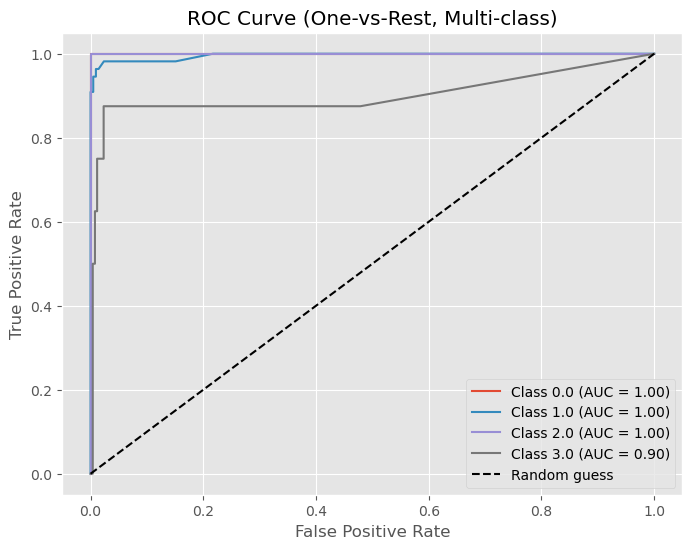

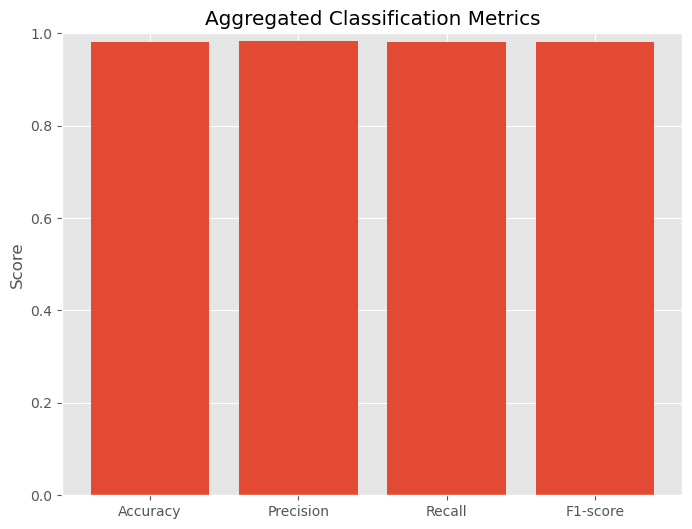

([RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42)],
       Feature  Importance
 24       m027    0.041520
 111  r_FeH3O2    0.025158
 217      m181    0.024762
 3    m015.580    0.024655
 279      m235    0.022105
 ..        ...         ...
 481      m422    0.000000
 480      m421    0.000000
 390  m332.900    0.000000
 273      m230    0.000000
 376      m320    0.000000
 
 [560 rows x 2 columns],
 [{'log_loss': 0.0845112302201887,
   'accuracy': 0.9814814814814815,
   'precision': 0.9907407407407407,
   'recall': 0.9814814814814815,
   'f1_score': 0.9841269841269841,
   'confusion_matrix': array([[36,  0,  0,  0],
          [ 0, 10,  0,  1],
          [ 0,  0,  6,  0],
          [ 0,  0,  0,  1]])},
  {'log_loss': 0.7196113579115357,
   'accuracy': 0.9629629629629629,
   'precision': 0.9279835390946503,
   'recall': 0.962

In [48]:
train_random_forest_kfold_with_metrics(df, "Pos_Neg")